In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

from IPython.display import clear_output

from sklearn.base import BaseEstimator # Decition Plot

In [2]:
datasets.MNIST(root='./data', train=False, download=True, transform=None)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [3]:
training_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

In [4]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [7]:
for batch in train_dataloader:
    print(batch[0].shape)
    break

torch.Size([64, 1, 28, 28])


In [8]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Laptop GPU'

In [9]:
from ttnet import TTNetForImages
from train import train_one_epoch, train, evaluate_acc

In [11]:
# x = torch.zeros(32, 1, 28, 28)
# model = TTNetForImages(in_channels=1, feat_dim=4, hid_dim=11, depth=16, num_classes=10)
# model(x).shape


In [12]:
# model = TTNetForImages(in_channels=1, feat_dim=4, hid_dim=15, depth=16, num_classes=10)
# training_loader = torch.utils.data.DataLoader(training_data, batch_size=32, shuffle=True)
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.004)

# from torchsummary import summary
# summary(model, (1, 28, 28), device="cpu")

In [14]:
# for i, data in enumerate(training_loader):
#     if i > 2:
#         break
#     inputs, labels = data
#     logits = model(inputs)
#     # print(logits)
#     probas = model.predict_proba(inputs)
#     # print(probas)

In [15]:
# train_one_epoch(model, loss_fn, optimizer, training_loader)

In [16]:
device

device(type='cuda')

In [18]:
feature_extractor = nn.Sequential(
    nn.Conv2d(1, 4, 7, stride=7, padding=0),
    nn.ReLU(),
    nn.Flatten(start_dim=-2)
)

model = TTNetForImages(feature_extractor, in_channels=1, feat_dim=4, hid_dim=20, depth=16, num_classes=10)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

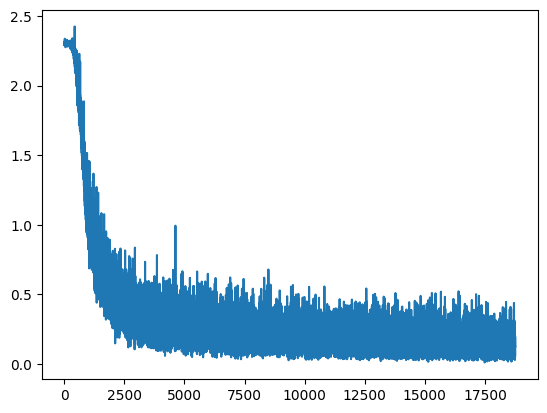

In [21]:
train(model, loss_fn, optimizer, train_dataloader, epochs=20, device=device)

In [22]:
evaluate_acc(model, train_dataloader, device=device)

tensor(57588, device='cuda:0') 60000
tensor(0.9598, device='cuda:0')


In [23]:
evaluate_acc(model, test_dataloader, device=device)

tensor(9545, device='cuda:0') 10000
tensor(0.9545, device='cuda:0')
